

#**Generating Charts**


In [0]:
#Reading files 

matrizDistancias = 'distance_matrix.xlsx'
correlacoes = 'x1x2_correlations.csv'
matrizMobilidades = 'mob_matrix.xlsx'
maxCorrelacoes = 'max_correlations.csv'

#Initial parameters
limit = 3000

#Eliminating unnecessary rows and columns from matrix

import pandas as pd

dist = pd.read_excel(matrizDistancias)
dist.drop('ZT', axis=1, inplace=True)
dist.index += 1

correlations = pd.read_csv(correlacoes)
correlations = correlations.astype({"X1": int, "X2": int})

mob = pd.read_excel(matrizMobilidades)
mob.drop('x', axis=1, inplace=True)
mob.index += 1

maxCorrelations = pd.read_csv(maxCorrelacoes)
maxCorrelations.drop('Unnamed: 0', axis=1, inplace=True)
maxCorrelations = maxCorrelations.astype({"X1": int, "X2": int})

### G1 - correlação X distância geográfica: espero uma nuvem de pontos, com (talvez) média bem definida (como em Ceron et al. 2019 - pasta literatura)

In [0]:
correlations['dist'] = correlations.apply(lambda x: dist.iloc[int(x[0])-1, int(x[1])-1], axis=1)

In [0]:
dist_versus_correlations = correlations[['dist', 'corr']]

In [0]:
dist_versus_correlations = dist_versus_correlations.dropna()

###Sorting daframe

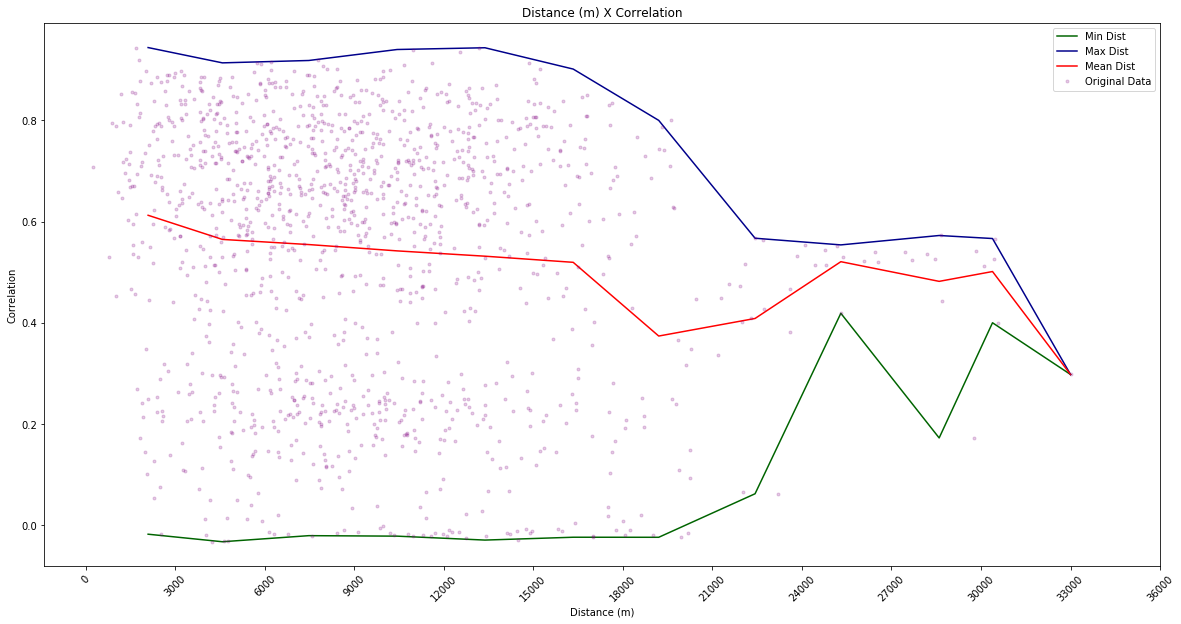

In [6]:
dist_versus_correlations = dist_versus_correlations.sort_values(by ='dist')

import math

max_dist = dist_versus_correlations.loc[dist_versus_correlations['dist'].idxmax()]

ceil = math.ceil(max_dist['dist'])+limit

maxs = []
mins = []
means = []

for i in range(0, ceil, limit):
  interval = dist_versus_correlations[dist_versus_correlations['dist'].between(i, i+limit)]
  
  if(len(interval)>0):
    corr_mean = interval['corr'].mean()
    dist_mean = interval['dist'].mean()
    num_elements = len(interval)
    means.append((dist_mean,corr_mean, num_elements))
    
    max = interval.loc[interval['corr'].idxmax()]
    min = interval.loc[interval['corr'].idxmin()]
    maxs.append((dist_mean, max['corr']))
    mins.append((dist_mean, min['corr']))
       
mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

means_dataframe.rename(columns={0: 'dist', 1: 'corr', 2: 'num_elements'}, inplace=True)
maxs_dataframe.rename(columns={0: 'dist', 1: 'corr'}, inplace=True)
mins_dataframe.rename(columns={0: 'dist', 1: 'corr'}, inplace=True)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

plt.plot(mins_dataframe['dist'], mins_dataframe['corr'], '-', label='Min Dist', color='darkGreen')
plt.plot(maxs_dataframe['dist'], maxs_dataframe['corr'], '-', label='Max Dist', color='darkBlue')
plt.plot(means_dataframe['dist'], means_dataframe['corr'], '-', label='Mean Dist', color='Red')
plt.plot(dist_versus_correlations['dist'], dist_versus_correlations['corr'], '.', label='Original Data', color ="purple", alpha=0.2)

plt.title('Distance (m) X Correlation')
plt.ylabel('Correlation')
plt.xlabel('Distance (m)')
plt.xticks(np.arange(0, ceil, step=limit), rotation='45')
plt.legend()
plt.savefig('dist_versus_correlations_'+str(limit)+'.pdf')

plt.show()


### G2 - correlação X mobilidade: espero uma nuvem de pontos ainda (talvez menos poluída do que no caso anterior) - e vale a pena ver a correlação média para cada valor de faixa de mobilidade 

In [7]:
def sum_mob(x):
  return (mob.iloc[int(x[0])-1, int(x[1])-1]+mob.iloc[int(x[1])-1, int(x[0])-1])

# correlations = pd.read_csv(correlacoes)
# correlations = correlations.astype({"X1": int, "X2": int})
correlations.head()

,X1,X2,corr,dist
0,1,2,0.791506,1476.718825
1,1,3,0.554248,1576.908816
2,1,4,0.806739,1789.142336
3,1,5,0.794176,870.921123
4,1,6,0.668890,1504.660907


In [8]:
correlations['mob'] = correlations.apply(lambda x: sum_mob(x), axis=1)
correlations.head()

,X1,X2,corr,dist,mob
0,1,2,0.791506,1476.718825,8032.909047
1,1,3,0.554248,1576.908816,4294.978694
2,1,4,0.806739,1789.142336,2858.853272
3,1,5,0.794176,870.921123,3332.474417
4,1,6,0.668890,1504.660907,9223.154459


In [9]:
mob_versus_correlations = correlations[['mob', 'corr']]
mob_versus_correlations = mob_versus_correlations.dropna()
mob_versus_correlations

,mob,corr
0,8032.909047,0.791506
1,4294.978694,0.554248
2,2858.853272,0.806739
3,3332.474417,0.794176
4,9223.154459,0.668890
...,...,...
1476,87.505263,0.177669
1477,0.000000,0.197819
1479,0.000000,0.012689
1480,0.000000,0.322496


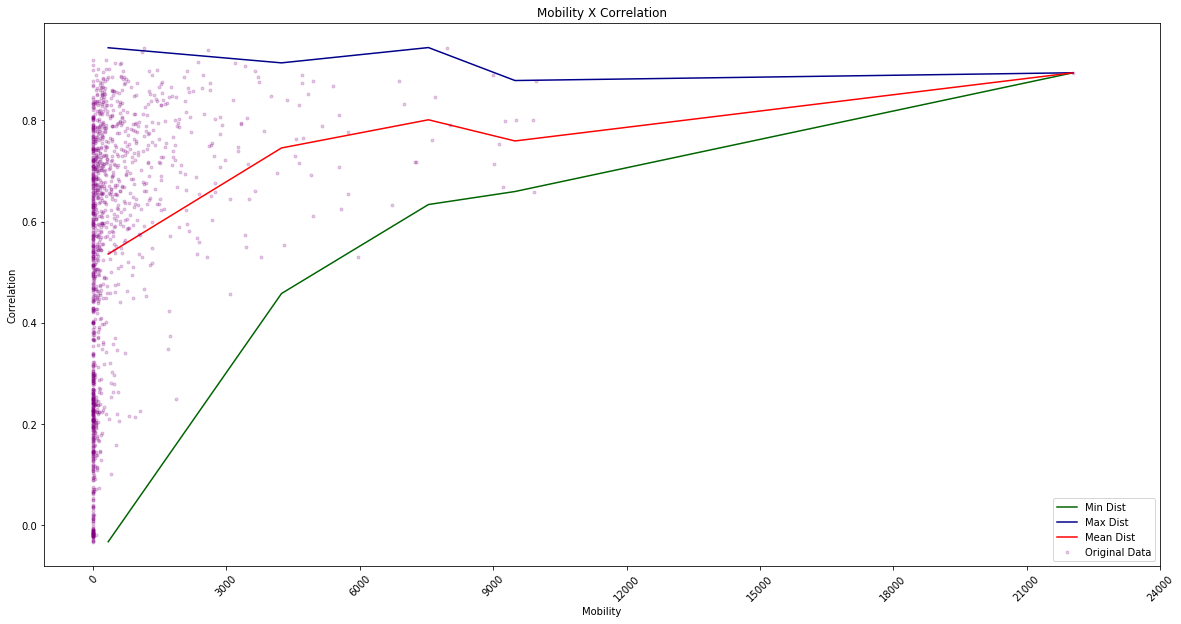

In [10]:
mob_versus_correlations = mob_versus_correlations.sort_values(by ='mob')

import math

max_dist = mob_versus_correlations.loc[mob_versus_correlations['mob'].idxmax()]

#limit = 2000
ceil = math.ceil(max_dist['mob'])+limit

maxs = []
mins = []
means = []

for i in range(0, ceil, limit):
  interval = mob_versus_correlations[mob_versus_correlations['mob'].between(i, i+limit)]
  
  if(len(interval)>0):
    corr_mean = interval['corr'].mean()
    mob_mean = interval['mob'].mean()
    means.append((mob_mean, corr_mean))

    max = interval.loc[interval['corr'].idxmax()]
    min = interval.loc[interval['corr'].idxmin()]
    maxs.append((mob_mean, max['corr']))
    mins.append((mob_mean, min['corr']))

mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

means_dataframe.rename(columns={0: 'mob', 1: 'corr', 2: 'num_elements'}, inplace=True)
maxs_dataframe.rename(columns={0: 'mob', 1: 'corr'}, inplace=True)
mins_dataframe.rename(columns={0: 'mob', 1: 'corr'}, inplace=True)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

plt.plot(mins_dataframe['mob'], mins_dataframe['corr'], '-', label='Min Dist', color='darkGreen')
plt.plot(maxs_dataframe['mob'], maxs_dataframe['corr'], '-', label='Max Dist', color='darkBlue')
plt.plot(means_dataframe['mob'], means_dataframe['corr'], '-', label='Mean Dist', color='Red')
plt.plot(mob_versus_correlations['mob'], mob_versus_correlations['corr'], '.', label='Original Data', color ="purple", alpha=0.2)

plt.title('Mobility X Correlation')
plt.ylabel('Correlation')
plt.xlabel('Mobility')
plt.xticks(np.arange(0, ceil, step=limit), rotation='45')
plt.legend()
plt.savefig('mob_versus_correlations_'+str(limit)+'.pdf')

plt.show()


###G3 - análogo ao 1 mas considerando a correlação máxima (com atraso), e vér media por faixa

In [11]:
data = maxCorrelations.astype({"X1": int, "X2": int})
data = data[['X1', 'X2', 'highest_corr']]
data.head()

,X1,X2,highest_corr
0,1,2,0.791506
1,1,3,0.554248
2,1,4,0.806739
3,1,5,0.794176
4,1,6,0.668890


In [12]:
data = data.dropna()
data['dist'] = data.apply(lambda x: dist.iloc[int(x[0])-1, int(x[1])-1], axis=1)
data

,X1,X2,highest_corr,dist
0,1,2,0.791506,1476.718825
1,1,3,0.554248,1576.908816
2,1,4,0.806739,1789.142336
3,1,5,0.794176,870.921123
4,1,6,0.668890,1504.660907
...,...,...,...,...
1476,51,53,0.184400,16961.803627
1477,51,54,0.197819,13108.973894
1479,52,53,0.392163,4000.933510
1480,52,54,0.322496,10482.672927


In [13]:
data = data[['highest_corr', 'dist']]
data.head()

,highest_corr,dist
0,0.791506,1476.718825
1,0.554248,1576.908816
2,0.806739,1789.142336
3,0.794176,870.921123
4,0.668890,1504.660907


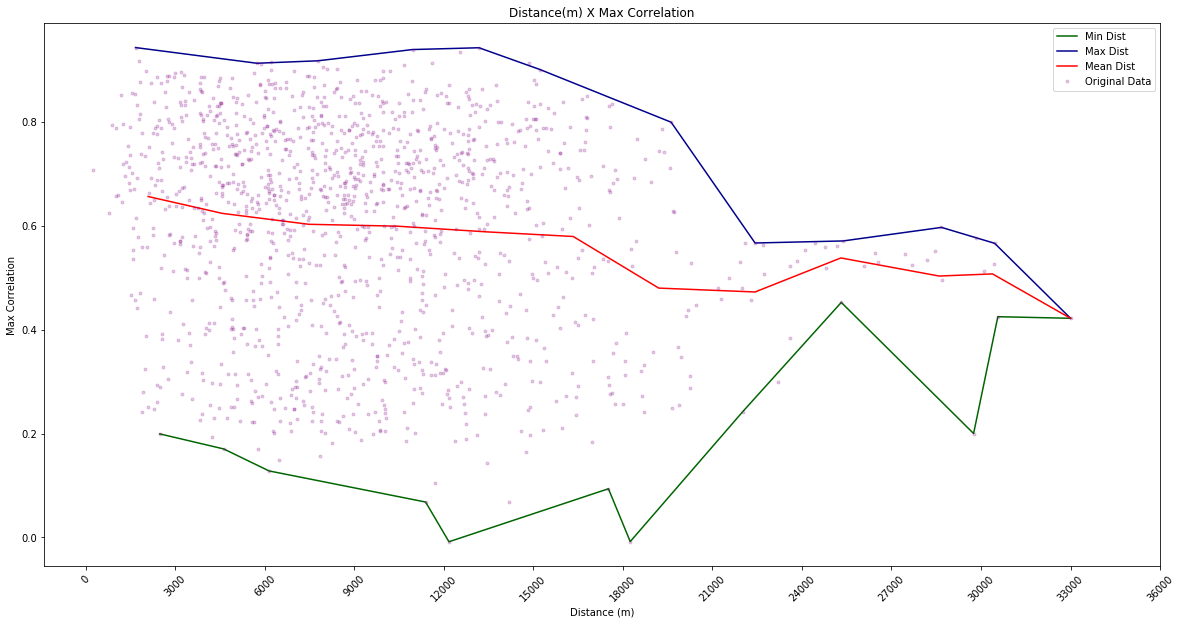

In [14]:
data = data.sort_values(by ='dist')

import math

max_dist = data.loc[dist_versus_correlations['dist'].idxmax()]
#limit = 2000
ceil = math.ceil(max_dist['dist'])+limit

maxs = []
mins = []
means = []

for i in range(0, ceil, limit):
  interval = data[data['dist'].between(i, i+limit)]
  
  if(len(interval)>0):
    max = interval.loc[interval['highest_corr'].idxmax()]
    min = interval.loc[interval['highest_corr'].idxmin()]
    maxs.append((max['dist'], max['highest_corr']))
    mins.append((min['dist'], min['highest_corr']))

    corr_mean = interval['highest_corr'].mean()
    dist_mean = interval['dist'].mean()
    means.append((dist_mean, corr_mean))

mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

means_dataframe.rename(columns={0: 'dist', 1: 'highest_corr', 2: 'num_elements'}, inplace=True)
maxs_dataframe.rename(columns={0: 'dist', 1: 'highest_corr'}, inplace=True)
mins_dataframe.rename(columns={0: 'dist', 1: 'highest_corr'}, inplace=True)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

plt.plot(mins_dataframe['dist'], mins_dataframe['highest_corr'], '-', label='Min Dist', color='darkGreen')
plt.plot(maxs_dataframe['dist'], maxs_dataframe['highest_corr'], '-', label='Max Dist', color='darkBlue')
plt.plot(means_dataframe['dist'], means_dataframe['highest_corr'], '-', label='Mean Dist', color='Red')
plt.plot(data['dist'], data['highest_corr'], '.', label='Original Data', color ="purple", alpha=0.2)

plt.title('Distance(m) X Max Correlation')
plt.ylabel('Max Correlation')
plt.xlabel('Distance (m)')
plt.xticks(np.arange(0, ceil, step=limit), rotation='45')
plt.legend()
plt.savefig('dist_versus_max_correlations_'+str(limit)+'.pdf')

plt.show()

###G4 - análogo ao 2 mas considerando a correlação máxima (com atraso), e vér media por faixa

In [15]:
def sum_mob(x):
  return (mob.iloc[int(x[0])-1, int(x[1])-1]+mob.iloc[int(x[1])-1, int(x[0])-1])

maxCorrelations['mob'] = maxCorrelations.apply(lambda x: sum_mob(x), axis=1)
maxCorrelations.head()

,X1,X2,corr,highest_corr,highest_k,mob
0,1,2,0.791506,0.791506,['k =0'],8032.909047
1,1,3,0.554248,0.554248,['k =0'],4294.978694
2,1,4,0.806739,0.806739,['k =0'],2858.853272
3,1,5,0.794176,0.794176,['k =0'],3332.474417
4,1,6,0.668890,0.668890,['k =0'],9223.154459


In [16]:
mob_versus_max_correlations = maxCorrelations[['mob', 'highest_corr']]
mob_versus_max_correlations.head()

,mob,highest_corr
0,8032.909047,0.791506
1,4294.978694,0.554248
2,2858.853272,0.806739
3,3332.474417,0.794176
4,9223.154459,0.668890


In [17]:
mob_versus_max_correlations = mob_versus_max_correlations.dropna()
mob_versus_max_correlations

,mob,highest_corr
0,8032.909047,0.791506
1,4294.978694,0.554248
2,2858.853272,0.806739
3,3332.474417,0.794176
4,9223.154459,0.668890
...,...,...
1476,87.505263,0.184400
1477,0.000000,0.197819
1479,0.000000,0.392163
1480,0.000000,0.322496


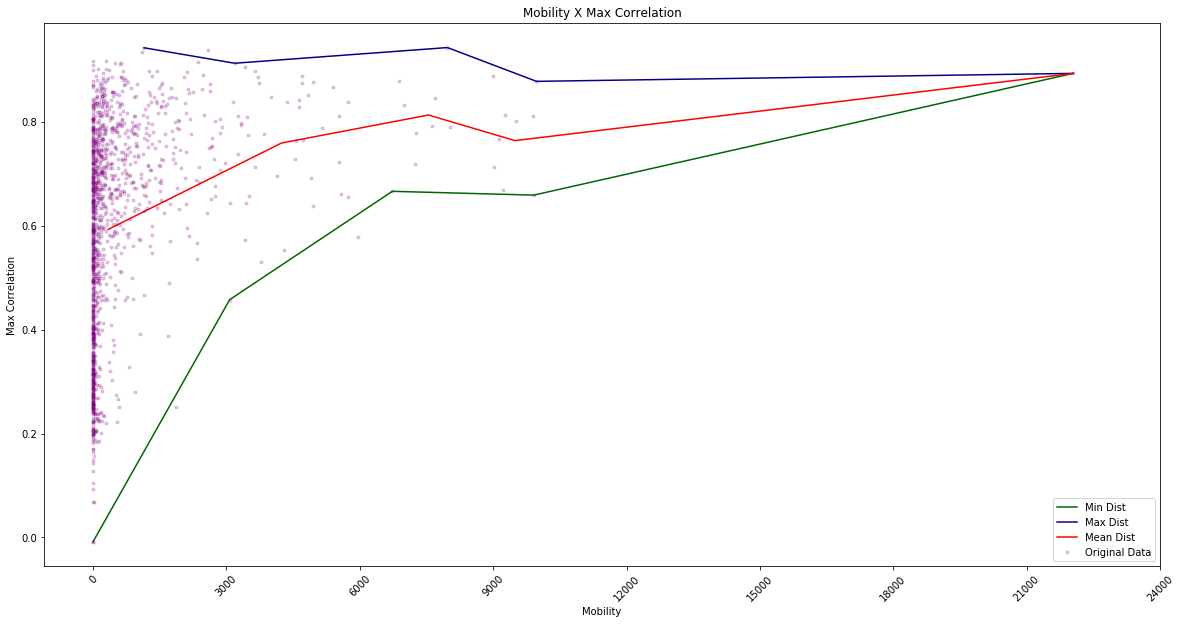

In [18]:
mob_versus_max_correlations = mob_versus_max_correlations.sort_values(by ='mob')
mob_versus_max_correlations

import math

max_dist = mob_versus_max_correlations.loc[mob_versus_max_correlations['mob'].idxmax()]
#limit = 2000
ceil = math.ceil(max_dist['mob'])+limit

maxs = []
mins = []
means = []

for i in range(0, ceil, limit):
  interval = mob_versus_max_correlations[mob_versus_max_correlations['mob'].between(i, i+limit)]
  
  if(len(interval)>0):
    max = interval.loc[interval['highest_corr'].idxmax()]
    min = interval.loc[interval['highest_corr'].idxmin()]
    maxs.append((max['highest_corr'], max['mob']))
    mins.append((min['highest_corr'], min['mob']))

    corr_mean = interval['highest_corr'].mean()
    mob_mean = interval['mob'].mean()
    means.append((corr_mean, mob_mean))

mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

means_dataframe.rename(columns={0: 'highest_corr', 1: 'mob', 2: 'num_elements'}, inplace=True)
maxs_dataframe.rename(columns={0: 'highest_corr', 1: 'mob'}, inplace=True)
mins_dataframe.rename(columns={0: 'highest_corr', 1: 'mob'}, inplace=True)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

plt.plot(mins_dataframe['mob'], mins_dataframe['highest_corr'], '-', label='Min Dist', color='darkGreen')
plt.plot(maxs_dataframe['mob'], maxs_dataframe['highest_corr'], '-', label='Max Dist', color='darkBlue')
plt.plot(means_dataframe['mob'], means_dataframe['highest_corr'], '-', label='Mean Dist', color='Red')
plt.plot(mob_versus_max_correlations['mob'], mob_versus_max_correlations['highest_corr'], '.', label='Original Data', color ="purple", alpha=0.2)

plt.title('Mobility X Max Correlation')
plt.ylabel('Max Correlation')
plt.xlabel('Mobility')
plt.xticks(np.arange(0, ceil, step=limit), rotation='45')
plt.legend()
plt.savefig('mob_versus_max_correlations_'+str(limit)+'.pdf')

plt.show()

###G5 - atraso X distância geográfica, e vér media por faixa

In [19]:
data = maxCorrelations.astype({"X1": int, "X2": int})
data = data[['X1', 'X2', 'highest_k']]
data['dist'] = data.apply(lambda x: dist.iloc[int(x[0])-1, int(x[1])-1], axis=1)

data = data[['highest_k', 'dist']]
data.head()

,highest_k,dist
0,['k =0'],1476.718825
1,['k =0'],1576.908816
2,['k =0'],1789.142336
3,['k =0'],870.921123
4,['k =0'],1504.660907


In [20]:
def return_k(highest_k):
  start_pt = highest_k.find("=")
  end_pt = highest_k.find("\'", start_pt + 1) 
  quote = highest_k[start_pt + 1: end_pt]
  return(quote)

data['highest_k_values'] = data.apply(lambda x: return_k(x[0]), axis=1)
data['highest_k_values'] = data['highest_k_values'].replace('[', 'NaN')
data = data.astype({"highest_k_values": float})
data.head()

,highest_k,dist,highest_k_values
0,['k =0'],1476.718825,0.0
1,['k =0'],1576.908816,0.0
2,['k =0'],1789.142336,0.0
3,['k =0'],870.921123,0.0
4,['k =0'],1504.660907,0.0


In [21]:
data = data.dropna()
data

,highest_k,dist,highest_k_values
0,['k =0'],1476.718825,0.0
1,['k =0'],1576.908816,0.0
2,['k =0'],1789.142336,0.0
3,['k =0'],870.921123,0.0
4,['k =0'],1504.660907,0.0
...,...,...,...
1476,['k =-1'],16961.803627,-1.0
1477,['k =0'],13108.973894,0.0
1479,['k =-1'],4000.933510,-1.0
1480,['k =0'],10482.672927,0.0


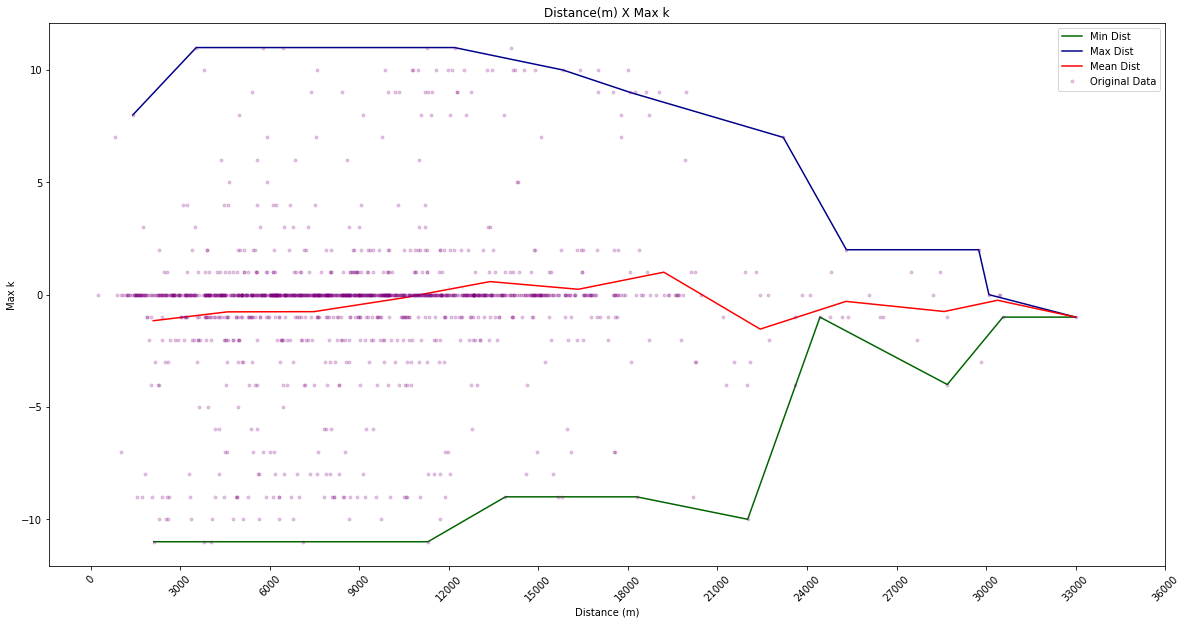

In [22]:
data = data.sort_values(by ='dist')

import math

max_dist = data.loc[dist_versus_correlations['dist'].idxmax()]
#limit = 2000

ceil = math.ceil(max_dist['dist'])+limit

maxs = []
mins = []
means = []

for i in range(0, ceil, limit):
  interval = data[data['dist'].between(i, i+limit)]
  
  if(len(interval)>0):
    max = interval.loc[interval['highest_k_values'].idxmax()]
    min = interval.loc[interval['highest_k_values'].idxmin()]
    maxs.append((max['dist'], max['highest_k_values']))
    mins.append((min['dist'], min['highest_k_values']))

    corr_mean = interval['highest_k_values'].mean()
    dist_mean = interval['dist'].mean()
    means.append((dist_mean, corr_mean))

mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

means_dataframe.rename(columns={0: 'dist', 1: 'highest_k_values', 2: 'num_elements'}, inplace=True)
maxs_dataframe.rename(columns={0: 'dist', 1: 'highest_k_values'}, inplace=True)
mins_dataframe.rename(columns={0: 'dist', 1: 'highest_k_values'}, inplace=True)

means_dataframe

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

plt.plot(mins_dataframe['dist'], mins_dataframe['highest_k_values'], '-', label='Min Dist', color='darkGreen')
plt.plot(maxs_dataframe['dist'], maxs_dataframe['highest_k_values'], '-', label='Max Dist', color='darkBlue')
plt.plot(means_dataframe['dist'], means_dataframe['highest_k_values'], '-', label='Mean Dist', color='Red')
plt.plot(data['dist'], data['highest_k_values'], '.', label='Original Data', color ="purple", alpha=0.2)

plt.title('Distance(m) X Max k')
plt.ylabel('Max k')
plt.xlabel('Distance (m)')
plt.xticks(np.arange(0, ceil, step=limit), rotation='45')
plt.legend()

plt.savefig('dist_versus_max_k_'+str(limit)+'.pdf')

plt.show()

###G6 - atraso X mobilidade, e vér media por faixa

In [23]:
data = maxCorrelations.astype({"X1": int, "X2": int})
data = data[['X1', 'X2', 'highest_k']]

def sum_mob(x):
  return (mob.iloc[int(x[0])-1, int(x[1])-1]+mob.iloc[int(x[1])-1, int(x[0])-1])

data['mob'] = correlations.apply(lambda x: sum_mob(x), axis=1)
data = data[['highest_k', 'mob']]
data.head()

,highest_k,mob
0,['k =0'],8032.909047
1,['k =0'],4294.978694
2,['k =0'],2858.853272
3,['k =0'],3332.474417
4,['k =0'],9223.154459


In [24]:
def return_k(highest_k):
  start_pt = highest_k.find("=")
  end_pt = highest_k.find("\'", start_pt + 1) 
  quote = highest_k[start_pt + 1: end_pt]
  return(quote)

data['highest_k_values'] = data.apply(lambda x: return_k(x[0]), axis=1)
data['highest_k_values'] = data['highest_k_values'].replace('[', 'NaN')
data = data.astype({"highest_k_values": float})
data.head()

,highest_k,mob,highest_k_values
0,['k =0'],8032.909047,0.0
1,['k =0'],4294.978694,0.0
2,['k =0'],2858.853272,0.0
3,['k =0'],3332.474417,0.0
4,['k =0'],9223.154459,0.0


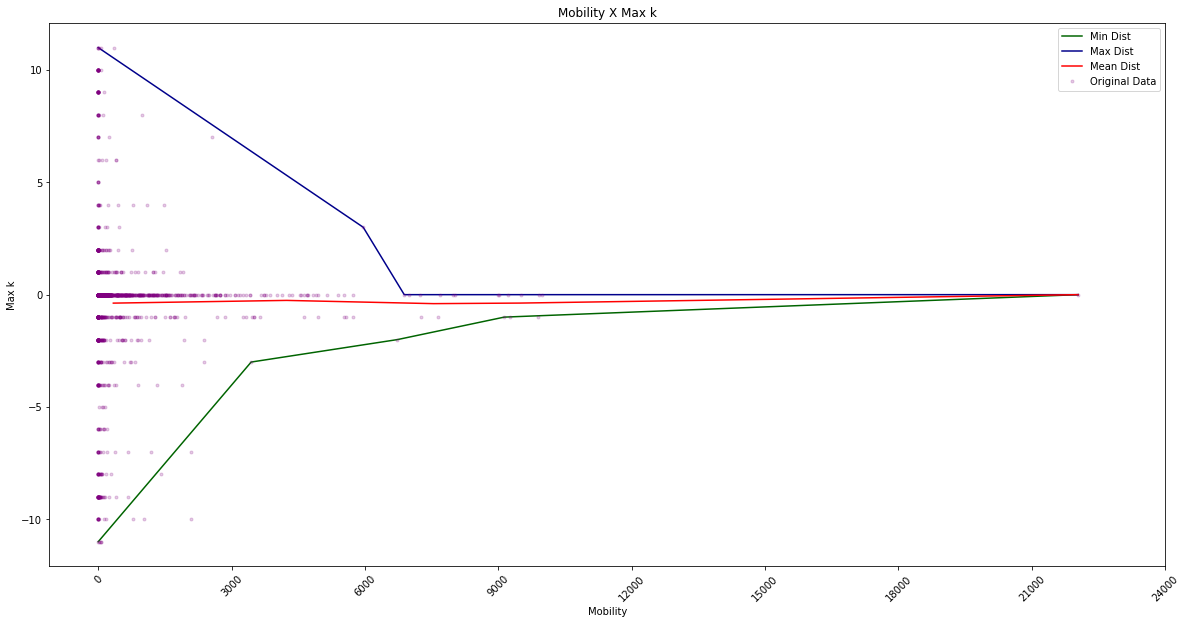

In [25]:
data = data.dropna()
data = data.sort_values(by ='mob')


import math

max_dist = data.loc[data['mob'].idxmax()]

#limit=2000
ceil = math.ceil(max_dist['mob'])+limit

maxs = []
mins = []
means = []

for i in range(0, ceil, limit):
  interval = data[data['mob'].between(i, i+limit)]
  
  if(len(interval)>0):
    max = interval.loc[interval['highest_k_values'].idxmax()]
    min = interval.loc[interval['highest_k_values'].idxmin()]
    maxs.append((max['highest_k_values'], max['mob']))
    mins.append((min['highest_k_values'], min['mob']))

    corr_mean = interval['highest_k_values'].mean()
    dist_mean = interval['mob'].mean()
    means.append((corr_mean, dist_mean))

mins_dataframe = pd.DataFrame(mins)
maxs_dataframe = pd.DataFrame(maxs)
means_dataframe = pd.DataFrame(means)

mins_dataframe.columns ={'highest_k_values', 'mob'}
maxs_dataframe.columns ={'highest_k_values', 'mob'}
means_dataframe.columns ={'highest_k_values', 'mob'}
means_dataframe

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

plt.plot(mins_dataframe['mob'], mins_dataframe['highest_k_values'], '-', label='Min Dist', color='darkGreen')
plt.plot(maxs_dataframe['mob'], maxs_dataframe['highest_k_values'], '-', label='Max Dist', color='darkBlue')
plt.plot(means_dataframe['mob'], means_dataframe['highest_k_values'], '-', label='Mean Dist', color='Red')
plt.plot(data['mob'], data['highest_k_values'], '.', label='Original Data', color ="purple", alpha=0.2)

plt.title('Mobility X Max k')
plt.ylabel('Max k')
plt.xlabel('Mobility')
plt.xticks(np.arange(0, ceil, step=limit), rotation='45')
plt.legend()

plt.savefig('mob_versus_max_k_'+str(limit)+'.pdf')
plt.show()

